### 美国2012年总统选举人政治献金数据分析

In [27]:
# 导入包
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

为了方便操作，将月份和参选人以及政党进行定义

In [28]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读文件

In [29]:
ele = pd.read_csv("./usa_election.csv")
ele.shape

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(536041, 16)

In [30]:
ele.head()
#cand_nm：候选人的姓名
#contbr_nm: 捐赠者的姓名
#contbr_occupation：捐赠者的职业
#contb_receipt_amt:捐赠者的额度
#contb_receipt_dt：时间

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式及基本信息

使用map函数+字典，新建一列各个候选人所在党派party

In [31]:
ele["party"] = ele["cand_nm"].map(parties)

查看单独一行，是否加上了'party'一列

In [32]:
ele.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [33]:
ele["party"].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [34]:
ele["party"].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [35]:
ele.groupby("party")["contb_receipt_amt"].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

查看具体每天各个党派收到的政治献金总数contb_receipt_amt

使用groupby([多个分组参数])

In [36]:
ele.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [37]:
ele.groupby(["party","contb_receipt_dt"])["contb_receipt_amt"].sum()

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [38]:
ele.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [39]:
def convert_date(date):
    day,mon,year = date.split("-")
    month = months[mon]
    time = '20'+str(year) + "-"+str(month) + "-" + str(day)
    return time

In [40]:
ele["contb_receipt_dt"] = ele["contb_receipt_dt"].map(convert_date)

In [41]:
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-6-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-8-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican


查看是否转换成功

In [42]:
ele.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

将时间转换为时间数据类型

根据时间进行排序

In [43]:
ele["contb_receipt_dt"] = pd.to_datetime(ele["contb_receipt_dt"])

In [45]:
ele.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

In [47]:
ele.sort_values("contb_receipt_dt", inplace=True)
ele

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478477,C00496067,P00003608,"Cain, Herman","BOELTER, ERIC",PEWAUKEE,WI,530723165,BOELTER COMPANIES,PRESIDENT,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463844,C00496067,P00003608,"Cain, Herman","COFFEY, DEBI",OVIEDO,FL,327656248,COMAIR AIRLINES,FLIGHT ATTENDANT,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
464372,C00496067,P00003608,"Cain, Herman","MONTGOMERY, PAT",SUWANEE,GA,300242360,MQEI INC.,CONSULTANT,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


得到转换后的，每天各政党所收政治献金数目。

知识点：groupby（多个字段）

In [48]:
ele.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [50]:
p_d_m = ele.groupby(["party","contb_receipt_dt"])["contb_receipt_amt"].sum()
p_d_m

party       contb_receipt_dt
Democrat    2011-04-04           640235.12
            2011-04-05           307641.00
            2011-04-06           247542.59
            2011-04-07           252336.00
            2011-04-08           295452.00
            2011-04-09           105879.00
            2011-04-10           100373.00
            2011-04-11           360728.00
            2011-04-12           405160.46
            2011-04-13           382836.33
            2011-04-14           306643.50
            2011-04-15           408377.00
            2011-04-16            82658.00
            2011-04-17            70802.00
            2011-04-18           501971.37
            2011-04-19           304874.00
            2011-04-20           314540.11
            2011-04-21           315618.00
            2011-04-22           295464.45
            2011-04-23            34829.00
            2011-04-24            37100.00
            2011-04-25           447282.00
            2011-04-26   

使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [51]:
p_d_m = p_d_m.unstack(level=0, fill_value=0)
p_d_m

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,0.00,0.0,0.00,8600.00
2011-01-03,0.00,0.0,0.00,4800.00
2011-01-04,0.00,0.0,0.00,5000.00
2011-01-12,0.00,0.0,0.00,4150.00
2011-01-13,0.00,0.0,0.00,4000.00
2011-01-14,0.00,0.0,0.00,6000.00
2011-01-15,0.00,0.0,0.00,500.00
2011-01-16,0.00,0.0,0.00,750.00
2011-01-17,0.00,0.0,0.00,500.00


使用上面获取的数据

画出各党派累计政治献金,cumsum()累加函数

In [52]:
p_d_m_cumsum = p_d_m.cumsum()
p_d_m_cumsum

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,0.00,0.00,0.00,8.600000e+03
2011-01-03,0.00,0.00,0.00,1.340000e+04
2011-01-04,0.00,0.00,0.00,1.840000e+04
2011-01-12,0.00,0.00,0.00,2.255000e+04
2011-01-13,0.00,0.00,0.00,2.655000e+04
2011-01-14,0.00,0.00,0.00,3.255000e+04
2011-01-15,0.00,0.00,0.00,3.305000e+04
2011-01-16,0.00,0.00,0.00,3.380000e+04
2011-01-17,0.00,0.00,0.00,3.430000e+04


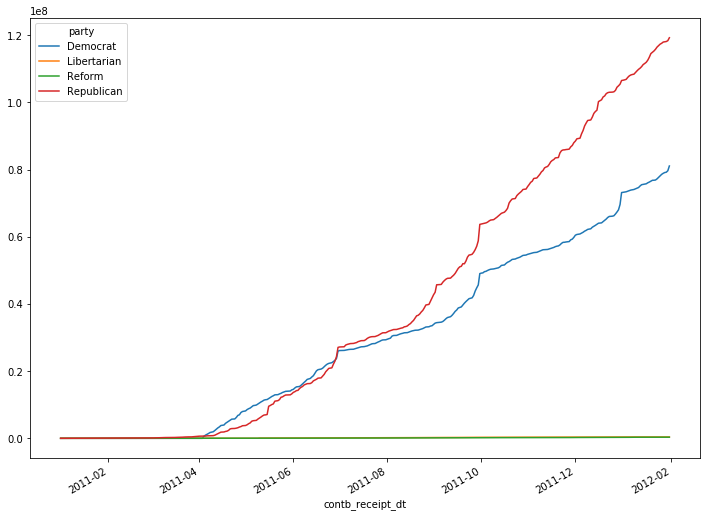

In [54]:
pic = p_d_m_cumsum.plot()
fig = pic.get_figure()
fig.set_size_inches((12,9))

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [55]:
p_d_m

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,0.00,0.0,0.00,8600.00
2011-01-03,0.00,0.0,0.00,4800.00
2011-01-04,0.00,0.0,0.00,5000.00
2011-01-12,0.00,0.0,0.00,4150.00
2011-01-13,0.00,0.0,0.00,4000.00
2011-01-14,0.00,0.0,0.00,6000.00
2011-01-15,0.00,0.0,0.00,500.00
2011-01-16,0.00,0.0,0.00,750.00
2011-01-17,0.00,0.0,0.00,500.00


In [56]:
p_d_m.stack().unstack(level=0)

contb_receipt_dt,2011-01-01 00:00:00,2011-01-03 00:00:00,2011-01-04 00:00:00,2011-01-12 00:00:00,2011-01-13 00:00:00,2011-01-14 00:00:00,2011-01-15 00:00:00,2011-01-16 00:00:00,2011-01-17 00:00:00,2011-01-18 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,,,,,,,,,,,,,,,,,
Democrat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67194.23,337307.07,458909.23,438949.32,450268.94,305785.47,235492.85,93177.00,435921.72,1418410.31
Libertarian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Reform,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,450.00,225.00,500.00,282.00,25.00,3176.37,175.00,200.00,130.00,150.00
Republican,8600.0,4800.0,5000.0,4150.0,4000.0,6000.0,500.0,750.0,500.0,4800.0,...,507168.71,645477.15,462233.66,416931.39,256406.86,368441.82,82775.80,75220.02,255204.80,869890.41


使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况
练习：groupy，sum()求和

In [57]:
ele.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [58]:
ele["cand_nm"].unique()

array(['Cain, Herman', 'Gingrich, Newt', "Roemer, Charles E. 'Buddy' III",
       'Pawlenty, Timothy', 'Obama, Barack', 'Romney, Mitt',
       'Santorum, Rick', 'Johnson, Gary Earl', 'Paul, Ron',
       'Bachmann, Michelle', 'Huntsman, Jon', 'McCotter, Thaddeus G',
       'Perry, Rick'], dtype=object)

In [60]:
result = ele.groupby(["cand_nm","contbr_occupation"])["contb_receipt_amt"].sum()
result

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

In [61]:
cond = result["Obama, Barack"] > 1e6
result["Obama, Barack"][cond]

contbr_occupation
ATTORNEY                  7112343.35
CEO                       1424473.67
CONSULTANT                1635916.36
HOMEMAKER                 2780203.60
INFORMATION REQUESTED     2647247.90
LAWYER                    1974727.92
NOT EMPLOYED              1034639.53
PHYSICIAN                 2244445.92
PRESIDENT                 1284919.95
PROFESSOR                 1321012.54
RETIRED                  15086766.92
Name: contb_receipt_amt, dtype: float64

In [ ]:
# 有钱的人都退休了

查看老兵主要支持谁：DISABLED VETERAN

考察Series索引

In [62]:
ele.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [63]:
cond = ele["contbr_occupation"] == "DISABLED VETERAN"
cond.sum()

60

In [64]:
ele["cand_nm"][cond].value_counts()

Obama, Barack     32
Paul, Ron         22
Santorum, Rick     3
Cain, Herman       3
Name: cand_nm, dtype: int64

In [65]:
ele[cond][["contb_receipt_amt","cand_nm"]].groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Cain, Herman       300.00
Obama, Barack     4205.00
Paul, Ron         2425.49
Santorum, Rick     250.00
Name: contb_receipt_amt, dtype: float64

把索引变成列,Series.reset_index()

In [66]:
ele["cand_nm"].reset_index()

,index,cand_nm
0,478480,"Cain, Herman"
1,475327,"Cain, Herman"
2,475328,"Cain, Herman"
3,478481,"Cain, Herman"
4,475329,"Cain, Herman"
5,469861,"Cain, Herman"
6,469860,"Cain, Herman"
7,478477,"Cain, Herman"
8,463844,"Cain, Herman"
9,464372,"Cain, Herman"


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额

通过query("查询条件来查找捐献人职业")

In [68]:
cond = ele.groupby("cand_nm")["contb_receipt_amt"].max()
cond

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [70]:
ele.query("cand_nm=='Obama, Barack' and contb_receipt_amt == 1944042.43")["contbr_nm"]

176127    OBAMA VICTORY FUND 2012 - UNITEMIZED
Name: contbr_nm, dtype: object